In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


In [ ]:
uploaded = files.upload()  # Prompts user to upload an image
image_path = list(uploaded.keys())[0]  # Gets the uploaded file name


Saving road_image.png to road_image.png


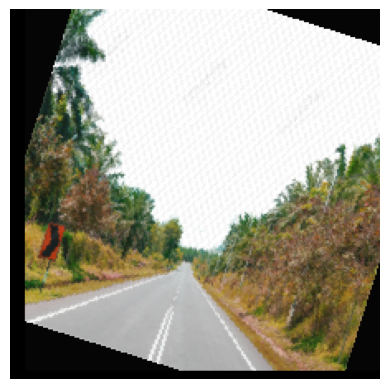

In [ ]:
# Define data augmentation transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 (ViT standard)
    transforms.RandomHorizontalFlip(p=0.5),  # Flip image horizontally (50% chance)
    transforms.RandomRotation(degrees=30),  # Rotate image randomly within ±30°
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, etc.
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Apply perspective distortion
    transforms.ToTensor(),  # Convert to tensor
])

# Load the image
image = Image.open(image_path).convert("RGB")  # Convert to RGB

# Apply transformations
augmented_image = transform(image)

# Convert tensor back to NumPy for visualization
augmented_image_np = augmented_image.permute(1, 2, 0).numpy()

# Display the augmented image
plt.imshow(augmented_image_np)
plt.axis("off")
plt.show()


In [ ]:
# Convert augmented tensor back to an image (for saving)
augmented_image_np = (augmented_image.permute(1, 2, 0).numpy() * 255).astype(np.uint8)

# Save the image
output_path = "augmented_image.jpg"
cv2.imwrite(output_path, cv2.cvtColor(augmented_image_np, cv2.COLOR_RGB2BGR))

# Download the augmented image
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>